In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp
from scipy import stats
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
import matplotlib.gridspec as gridspec

/home/asier/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/asier/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/base.py:7: Ru

In [2]:
nombres = ['Results_Ia_0.5_0.2._20_.txt','Results_Ia_0.5_25._20_.txt' ,'Results_Ia_0.5_50._20_.txt' 
           ,'Results_Ia_0.5_75._20_.txt','Results_Ia_0.5_100._20_.txt','Results_Ia_0.5_125._20_.txt'
           ,'Results_Ia_0.5_150._20_.txt','Results_Ia_0.5_175._20_.txt','Results_Ia_0.5_200._20_.txt'
           ,'Results_Ia_0.5_225._20_.txt','Results_Ia_0.5_250._20_.txt','Results_Ia_0.5_275._20_.txt'
           ,'Results_Ia_0.5_300._20_.txt','Results_Ia_0.5_350._20_.txt','Results_Ia_0.5_400._20_.txt'
           ,'Results_Ia_0.5_450._20_.txt','Results_Ia_0.5_500._20_.txt','Results_Ia_0.5_550._20_.txt'
           ,'Results_Ia_0.5_600._20_.txt','Results_Ia_0.5_800._20_.txt','Results_Ia_0.5_010._20_.txt'
           ,'Results_Ia_0.5_015._20_.txt','Results_Ia_0.5_020._20_.txt'
           
           ,'Results_Ia_0.6_0.2._20_.txt','Results_Ia_0.6_25._20_.txt' ,'Results_Ia_0.6_50._20_.txt' 
           ,'Results_Ia_0.6_75._20_.txt','Results_Ia_0.6_100._20_.txt','Results_Ia_0.6_125._20_.txt'
           ,'Results_Ia_0.6_150._20_.txt','Results_Ia_0.6_175._20_.txt','Results_Ia_0.6_200._20_.txt'
           ,'Results_Ia_0.6_225._20_.txt','Results_Ia_0.6_250._20_.txt','Results_Ia_0.6_275._20_.txt'
           ,'Results_Ia_0.6_300._20_.txt','Results_Ia_0.6_350._20_.txt','Results_Ia_0.6_400._20_.txt'
           ,'Results_Ia_0.6_450._20_.txt','Results_Ia_0.6_500._20_.txt','Results_Ia_0.6_550._20_.txt'
           ,'Results_Ia_0.6_600._20_.txt','Results_Ia_0.6_800._20_.txt','Results_Ia_0.6_010._20_.txt'
           ,'Results_Ia_0.6_015._20_.txt','Results_Ia_0.6_020._20_.txt'
           
           ,'Results_Ia_0.7_0.2._20_.txt','Results_Ia_0.7_25._20_.txt' ,'Results_Ia_0.7_50._20_.txt' 
           ,'Results_Ia_0.7_75._20_.txt','Results_Ia_0.7_100._20_.txt','Results_Ia_0.7_125._20_.txt'
           ,'Results_Ia_0.7_150._20_.txt','Results_Ia_0.7_175._20_.txt','Results_Ia_0.7_200._20_.txt'
           ,'Results_Ia_0.7_225._20_.txt','Results_Ia_0.7_250._20_.txt','Results_Ia_0.7_275._20_.txt'
           ,'Results_Ia_0.7_300._20_.txt','Results_Ia_0.7_350._20_.txt','Results_Ia_0.7_400._20_.txt'
           ,'Results_Ia_0.7_450._20_.txt','Results_Ia_0.7_500._20_.txt','Results_Ia_0.7_550._20_.txt'
           ,'Results_Ia_0.7_600._20_.txt','Results_Ia_0.7_800._20_.txt','Results_Ia_0.7_010._20_.txt'
           ,'Results_Ia_0.7_015._20_.txt','Results_Ia_0.7_020._20_.txt'

            ,'Results_Ia_0.8_0.2._20_.txt','Results_Ia_0.8_25._20_.txt' ,'Results_Ia_0.8_50._20_.txt' 
           ,'Results_Ia_0.8_75._20_.txt','Results_Ia_0.8_100._20_.txt','Results_Ia_0.8_125._20_.txt'
           ,'Results_Ia_0.8_150._20_.txt','Results_Ia_0.8_175._20_.txt','Results_Ia_0.8_200._20_.txt'
           ,'Results_Ia_0.8_225._20_.txt','Results_Ia_0.8_250._20_.txt','Results_Ia_0.8_275._20_.txt'
           ,'Results_Ia_0.8_300._20_.txt','Results_Ia_0.8_350._20_.txt','Results_Ia_0.8_400._20_.txt'
           ,'Results_Ia_0.8_450._20_.txt','Results_Ia_0.8_500._20_.txt','Results_Ia_0.8_550._20_.txt'
           ,'Results_Ia_0.8_600._20_.txt','Results_Ia_0.8_800._20_.txt','Results_Ia_0.8_010._20_.txt'
           ,'Results_Ia_0.8_015._20_.txt','Results_Ia_0.8_020._20_.txt'

            ,'Results_Ia_0.9_0.2._20_.txt','Results_Ia_0.9_25._20_.txt' ,'Results_Ia_0.9_50._20_.txt' 
           ,'Results_Ia_0.9_75._20_.txt','Results_Ia_0.9_100._20_.txt','Results_Ia_0.9_125._20_.txt'
           ,'Results_Ia_0.9_150._20_.txt','Results_Ia_0.9_175._20_.txt','Results_Ia_0.9_200._20_.txt'
           ,'Results_Ia_0.9_225._20_.txt','Results_Ia_0.9_250._20_.txt','Results_Ia_0.9_275._20_.txt'
           ,'Results_Ia_0.9_300._20_.txt','Results_Ia_0.9_350._20_.txt','Results_Ia_0.9_400._20_.txt'
           ,'Results_Ia_0.9_450._20_.txt','Results_Ia_0.9_500._20_.txt','Results_Ia_0.9_550._20_.txt'
           ,'Results_Ia_0.9_600._20_.txt','Results_Ia_0.9_800._20_.txt','Results_Ia_0.9_010._20_.txt'
           ,'Results_Ia_0.9_015._20_.txt','Results_Ia_0.9_020._20_.txt'
           
           ,'Results_Ia_1.0_0.2._20_.txt','Results_Ia_1.0_25._20_.txt' ,'Results_Ia_1.0_50._20_.txt' 
           ,'Results_Ia_1.0_75._20_.txt','Results_Ia_1.0_100._20_.txt','Results_Ia_1.0_125._20_.txt'
           ,'Results_Ia_1.0_150._20_.txt','Results_Ia_1.0_175._20_.txt','Results_Ia_1.0_200._20_.txt'
           ,'Results_Ia_1.0_225._20_.txt','Results_Ia_1.0_250._20_.txt','Results_Ia_1.0_275._20_.txt'
           ,'Results_Ia_1.0_300._20_.txt','Results_Ia_1.0_350._20_.txt','Results_Ia_1.0_400._20_.txt'
           ,'Results_Ia_1.0_450._20_.txt','Results_Ia_1.0_500._20_.txt','Results_Ia_1.0_550._20_.txt'
           ,'Results_Ia_1.0_600._20_.txt','Results_Ia_1.0_800._20_.txt','Results_Ia_1.0_010._20_.txt'
           ,'Results_Ia_1.0_015._20_.txt','Results_Ia_1.0_020._20_.txt'
           
           ,'Results_Ia_1.1_0.2._20_.txt','Results_Ia_1.1_25._20_.txt' ,'Results_Ia_1.1_50._20_.txt' 
           ,'Results_Ia_1.1_75._20_.txt','Results_Ia_1.1_100._20_.txt','Results_Ia_1.1_125._20_.txt'
           ,'Results_Ia_1.1_150._20_.txt','Results_Ia_1.1_175._20_.txt','Results_Ia_1.1_200._20_.txt'
           ,'Results_Ia_1.1_225._20_.txt','Results_Ia_1.1_250._20_.txt','Results_Ia_1.1_275._20_.txt'
           ,'Results_Ia_1.1_300._20_.txt','Results_Ia_1.1_350._20_.txt','Results_Ia_1.1_400._20_.txt'
           ,'Results_Ia_1.1_450._20_.txt','Results_Ia_1.1_500._20_.txt','Results_Ia_1.1_550._20_.txt'
           ,'Results_Ia_1.1_600._20_.txt','Results_Ia_1.1_800._20_.txt','Results_Ia_1.1_010._20_.txt'
           ,'Results_Ia_1.1_015._20_.txt','Results_Ia_1.1_020._20_.txt'
           
           ,'Results_Ia_1.2_0.2._20_.txt','Results_Ia_1.2_25._20_.txt' ,'Results_Ia_1.2_50._20_.txt' 
           ,'Results_Ia_1.2_75._20_.txt','Results_Ia_1.2_100._20_.txt','Results_Ia_1.2_125._20_.txt'
           ,'Results_Ia_1.2_150._20_.txt','Results_Ia_1.2_175._20_.txt','Results_Ia_1.2_200._20_.txt'
           ,'Results_Ia_1.2_225._20_.txt','Results_Ia_1.2_250._20_.txt','Results_Ia_1.2_275._20_.txt'
           ,'Results_Ia_1.2_300._20_.txt','Results_Ia_1.2_350._20_.txt','Results_Ia_1.2_400._20_.txt'
           ,'Results_Ia_1.2_450._20_.txt','Results_Ia_1.2_500._20_.txt','Results_Ia_1.2_550._20_.txt'
           ,'Results_Ia_1.2_600._20_.txt','Results_Ia_1.2_800._20_.txt','Results_Ia_1.2_010._20_.txt'
           ,'Results_Ia_1.2_015._20_.txt','Results_Ia_1.2_020._20_.txt'
           
           ,'Results_Ia_1.3_0.2._20_.txt','Results_Ia_1.3_25._20_.txt' ,'Results_Ia_1.3_50._20_.txt' 
           ,'Results_Ia_1.3_75._20_.txt','Results_Ia_1.3_100._20_.txt','Results_Ia_1.3_125._20_.txt'
           ,'Results_Ia_1.3_150._20_.txt','Results_Ia_1.3_175._20_.txt','Results_Ia_1.3_200._20_.txt'
           ,'Results_Ia_1.3_225._20_.txt','Results_Ia_1.3_250._20_.txt','Results_Ia_1.3_275._20_.txt'
           ,'Results_Ia_1.3_300._20_.txt','Results_Ia_1.3_350._20_.txt','Results_Ia_1.3_400._20_.txt'
           ,'Results_Ia_1.3_450._20_.txt','Results_Ia_1.3_500._20_.txt','Results_Ia_1.3_550._20_.txt'
           ,'Results_Ia_1.3_600._20_.txt','Results_Ia_1.3_800._20_.txt','Results_Ia_1.3_010._20_.txt'
           ,'Results_Ia_1.3_015._20_.txt','Results_Ia_1.3_020._20_.txt'
           
           ,'Results_Ia_1.4_0.2._20_.txt','Results_Ia_1.4_25._20_.txt' ,'Results_Ia_1.4_50._20_.txt' 
           ,'Results_Ia_1.4_75._20_.txt','Results_Ia_1.4_100._20_.txt','Results_Ia_1.4_125._20_.txt'
           ,'Results_Ia_1.4_150._20_.txt','Results_Ia_1.4_175._20_.txt','Results_Ia_1.4_200._20_.txt'
           ,'Results_Ia_1.4_225._20_.txt','Results_Ia_1.4_250._20_.txt','Results_Ia_1.4_275._20_.txt'
           ,'Results_Ia_1.4_300._20_.txt','Results_Ia_1.4_350._20_.txt','Results_Ia_1.4_400._20_.txt'
           ,'Results_Ia_1.4_450._20_.txt','Results_Ia_1.4_500._20_.txt','Results_Ia_1.4_550._20_.txt'
           ,'Results_Ia_1.4_600._20_.txt','Results_Ia_1.4_800._20_.txt','Results_Ia_1.4_010._20_.txt'
           ,'Results_Ia_1.4_015._20_.txt','Results_Ia_1.4_020._20_.txt'
           
           ,'Results_Ia_1.5_0.2._20_.txt','Results_Ia_1.5_25._20_.txt' ,'Results_Ia_1.5_50._20_.txt' 
           ,'Results_Ia_1.5_75._20_.txt','Results_Ia_1.5_100._20_.txt','Results_Ia_1.5_125._20_.txt'
           ,'Results_Ia_1.5_150._20_.txt','Results_Ia_1.5_175._20_.txt','Results_Ia_1.5_200._20_.txt'
           ,'Results_Ia_1.5_225._20_.txt','Results_Ia_1.5_250._20_.txt','Results_Ia_1.5_275._20_.txt'
           ,'Results_Ia_1.5_300._20_.txt','Results_Ia_1.5_350._20_.txt','Results_Ia_1.5_400._20_.txt'
           ,'Results_Ia_1.5_450._20_.txt','Results_Ia_1.5_500._20_.txt','Results_Ia_1.5_550._20_.txt'
           ,'Results_Ia_1.5_600._20_.txt','Results_Ia_1.5_800._20_.txt','Results_Ia_1.5_010._20_.txt'
           ,'Results_Ia_1.5_015._20_.txt','Results_Ia_1.5_020._20_.txt'
           
           ,'Results_Ia_1.6_0.2._20_.txt','Results_Ia_1.6_25._20_.txt' ,'Results_Ia_1.6_50._20_.txt' 
           ,'Results_Ia_1.6_75._20_.txt','Results_Ia_1.6_100._20_.txt','Results_Ia_1.6_125._20_.txt'
           ,'Results_Ia_1.6_150._20_.txt','Results_Ia_1.6_175._20_.txt','Results_Ia_1.6_200._20_.txt'
           ,'Results_Ia_1.6_225._20_.txt','Results_Ia_1.6_250._20_.txt','Results_Ia_1.6_275._20_.txt'
           ,'Results_Ia_1.6_300._20_.txt','Results_Ia_1.6_350._20_.txt','Results_Ia_1.6_400._20_.txt'
           ,'Results_Ia_1.6_450._20_.txt','Results_Ia_1.6_500._20_.txt','Results_Ia_1.6_550._20_.txt'
           ,'Results_Ia_1.6_600._20_.txt','Results_Ia_1.6_800._20_.txt','Results_Ia_1.6_010._20_.txt'
           ,'Results_Ia_1.6_015._20_.txt','Results_Ia_1.6_020._20_.txt'
           
           ,'Results_Ia_1.7_0.2._20_.txt','Results_Ia_1.7_25._20_.txt' ,'Results_Ia_1.7_50._20_.txt' 
           ,'Results_Ia_1.7_75._20_.txt','Results_Ia_1.7_100._20_.txt','Results_Ia_1.7_125._20_.txt'
           ,'Results_Ia_1.7_150._20_.txt','Results_Ia_1.7_175._20_.txt','Results_Ia_1.7_200._20_.txt'
           ,'Results_Ia_1.7_225._20_.txt','Results_Ia_1.7_250._20_.txt','Results_Ia_1.7_275._20_.txt'
           ,'Results_Ia_1.7_300._20_.txt','Results_Ia_1.7_350._20_.txt','Results_Ia_1.7_400._20_.txt'
           ,'Results_Ia_1.7_450._20_.txt','Results_Ia_1.7_500._20_.txt','Results_Ia_1.7_550._20_.txt'
           ,'Results_Ia_1.7_600._20_.txt','Results_Ia_1.7_800._20_.txt','Results_Ia_1.7_010._20_.txt'
           ,'Results_Ia_1.7_015._20_.txt','Results_Ia_1.7_020._20_.txt'
           
           ,'Results_Ia_1.8_0.2._20_.txt','Results_Ia_1.8_25._20_.txt' ,'Results_Ia_1.8_50._20_.txt' 
           ,'Results_Ia_1.8_75._20_.txt','Results_Ia_1.8_100._20_.txt','Results_Ia_1.8_125._20_.txt'
           ,'Results_Ia_1.8_150._20_.txt','Results_Ia_1.8_175._20_.txt','Results_Ia_1.8_200._20_.txt'
           ,'Results_Ia_1.8_225._20_.txt','Results_Ia_1.8_250._20_.txt','Results_Ia_1.8_275._20_.txt'
           ,'Results_Ia_1.8_300._20_.txt','Results_Ia_1.8_350._20_.txt','Results_Ia_1.8_400._20_.txt'
           ,'Results_Ia_1.8_450._20_.txt','Results_Ia_1.8_500._20_.txt','Results_Ia_1.8_550._20_.txt'
           ,'Results_Ia_1.8_600._20_.txt','Results_Ia_1.8_800._20_.txt','Results_Ia_1.8_010._20_.txt'
           ,'Results_Ia_1.8_015._20_.txt','Results_Ia_1.8_020._20_.txt'
           
           ,'Results_Ia_1.9_0.2._20_.txt','Results_Ia_1.9_25._20_.txt' ,'Results_Ia_1.9_50._20_.txt' 
           ,'Results_Ia_1.9_75._20_.txt','Results_Ia_1.9_100._20_.txt','Results_Ia_1.9_125._20_.txt'
           ,'Results_Ia_1.9_150._20_.txt','Results_Ia_1.9_175._20_.txt','Results_Ia_1.9_200._20_.txt'
           ,'Results_Ia_1.9_225._20_.txt','Results_Ia_1.9_250._20_.txt','Results_Ia_1.9_275._20_.txt'
           ,'Results_Ia_1.9_300._20_.txt','Results_Ia_1.9_350._20_.txt','Results_Ia_1.9_400._20_.txt'
           ,'Results_Ia_1.9_450._20_.txt','Results_Ia_1.9_500._20_.txt','Results_Ia_1.9_550._20_.txt'
           ,'Results_Ia_1.9_600._20_.txt','Results_Ia_1.9_800._20_.txt','Results_Ia_1.9_010._20_.txt'
           ,'Results_Ia_1.9_015._20_.txt','Results_Ia_1.9_020._20_.txt'
           
           ,'Results_Ia_2.0_0.2._20_.txt','Results_Ia_2.0_25._20_.txt' ,'Results_Ia_2.0_50._20_.txt' 
           ,'Results_Ia_2.0_75._20_.txt','Results_Ia_2.0_100._20_.txt','Results_Ia_2.0_125._20_.txt'
           ,'Results_Ia_2.0_150._20_.txt','Results_Ia_2.0_175._20_.txt','Results_Ia_2.0_200._20_.txt'
           ,'Results_Ia_2.0_225._20_.txt','Results_Ia_2.0_250._20_.txt','Results_Ia_2.0_275._20_.txt'
           ,'Results_Ia_2.0_300._20_.txt','Results_Ia_2.0_350._20_.txt','Results_Ia_2.0_400._20_.txt'
           ,'Results_Ia_2.0_450._20_.txt','Results_Ia_2.0_500._20_.txt','Results_Ia_2.0_550._20_.txt'
           ,'Results_Ia_2.0_600._20_.txt','Results_Ia_2.0_800._20_.txt','Results_Ia_2.0_010._20_.txt'
           ,'Results_Ia_2.0_015._20_.txt','Results_Ia_2.0_020._20_.txt'
           
           ,'Results_Ia_2.1_0.2._20_.txt','Results_Ia_2.1_25._20_.txt' ,'Results_Ia_2.1_50._20_.txt' 
           ,'Results_Ia_2.1_75._20_.txt','Results_Ia_2.1_100._20_.txt','Results_Ia_2.1_125._20_.txt'
           ,'Results_Ia_2.1_150._20_.txt','Results_Ia_2.1_175._20_.txt','Results_Ia_2.1_200._20_.txt'
           ,'Results_Ia_2.1_225._20_.txt','Results_Ia_2.1_250._20_.txt','Results_Ia_2.1_275._20_.txt'
           ,'Results_Ia_2.1_300._20_.txt','Results_Ia_2.1_350._20_.txt','Results_Ia_2.1_400._20_.txt'
           ,'Results_Ia_2.1_450._20_.txt','Results_Ia_2.1_500._20_.txt','Results_Ia_2.1_550._20_.txt'
           ,'Results_Ia_2.1_600._20_.txt','Results_Ia_2.1_800._20_.txt','Results_Ia_2.1_010._20_.txt'
           ,'Results_Ia_2.1_015._20_.txt','Results_Ia_2.1_020._20_.txt'
          ]

In [357]:
nombres = ['Results_CC_10.txt','Results_CC_20.txt','Results_CC_30.txt','Results_CC_40.txt'
           ,'Results_CC_50.txt','Results_CC_60.txt','Results_CC_70.txt','Results_CC_80.txt'
           ,'Results_CC_90.txt','Results_CC_100.txt','Results_CC_125.txt','Results_CC_150.txt'
           ,'Results_CC_175.txt','Results_CC_200.txt','Results_CC_250.txt','Results_CC_300.txt'
           ,'Results_CC_400.txt','Results_CC_500.txt','Results_CC_700.txt'
          ]

In [322]:
nombres = ['Results_Ha.txt','Results_Mass.txt','Results_Za.txt','Results_Zb.txt']

In [3]:
index_DTD = 0
index_SFR = 0
index_Ha = 0
index_Mass = 0
index_Za = 0
index_ZaB = 0

Prob_DTD = pd.DataFrame(columns=['Alfa','Delta','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_SFR = pd.DataFrame(columns=['Sigma','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Ha = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Mass = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_Za = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])
Prob_ZaB = pd.DataFrame(columns=['N','KS_Ia','AD_Ia','KS_CC','AD_CC'])

Dist_DTD_Ia = pd.DataFrame()
Dist_DTD_CC = pd.DataFrame()
Dist_DTD_Ic = pd.DataFrame()
Dist_SFR_Ia = pd.DataFrame()
Dist_SFR_CC = pd.DataFrame()
Dist_SFR_Ic = pd.DataFrame()
Dist_Ha_Ia = pd.DataFrame()
Dist_Ha_CC = pd.DataFrame()
Dist_Ha_Ic = pd.DataFrame()
Dist_Mass_Ia = pd.DataFrame()
Dist_Mass_CC = pd.DataFrame()
Dist_Mass_Ic = pd.DataFrame()
Dist_Za_Ia = pd.DataFrame()
Dist_Za_CC = pd.DataFrame()
Dist_Za_Ic = pd.DataFrame()
Dist_ZaB_Ia = pd.DataFrame()
Dist_ZaB_CC = pd.DataFrame()
Dist_ZaB_Ic = pd.DataFrame()

for name in nombres:

    #print(name)
    
    df = pd.read_csv('../'+name+'', sep=" ", header=None)
    df.columns = ["SN", "p", "P"]
    R = df.shape[0]

    #-------------------------------------------------------------------------------------------------------------------

    # Distribuciones para las supernovas Ia

    P_Ia = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 1:
            P_Ia[k] = float(df.at[i,'P'])
            k = k + 1

    #P_Ia = P_Ia[P_Ia > 0]
    P_Ia = np.sort(P_Ia)
    P_Ia = P_Ia[48:]
    P_Ia = P_Ia[6:]

    N_Ia = np.arange(len(P_Ia))
    N_Ia = N_Ia + 0.5
    N_Ia = np.double(N_Ia)/(len(N_Ia))

    # Distribuciones para las supernovas CC

    P_CC = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 2:
            P_CC[k] = float(df.at[i,'P'])
            k = k + 1

    #P_CC = P_CC[P_CC > 0]
    P_CC = np.sort(P_CC)
    P_CC = P_CC[97:]
    #P_CC = P_CC[2:]

    N_CC = np.arange(len(P_CC))
    N_CC = N_CC + 0.5
    N_CC = np.double(N_CC)/(len(N_CC))
    
    # Distribuciones para las supernovas Ic

    P_Ic = np.zeros(R)
    k = 0
    for i in np.arange(len(df['SN'])):
        if df.at[i,'SN'] == 3:
            P_Ic[k] = float(df.at[i,'P'])
            k = k + 1
            
    #P_Ic = P_Ic[P_Ic > 0]
    P_Ic = np.sort(P_Ic)
    P_Ic = P_Ic[123:]

    N_Ic = np.arange(len(P_Ic))
    N_Ic = N_Ic + 0.5
    N_Ic = np.double(N_Ic)/(len(N_Ic))

    #-------------------------------------------------------------------------------------------------------------------

    # Test Kolmogorov Smirnov

    P_Ia_KS  = ks_2samp(P_Ia,  N_Ia)[1]
    P_Ia_KS = np.around(P_Ia_KS*100,2)

    P_CC_KS  = ks_2samp(P_CC,  N_CC)[1]
    P_CC_KS = np.around(P_CC_KS*100,2)
    
    P_Ic_KS  = ks_2samp(P_Ic,  N_Ic)[1]
    P_Ic_KS = np.around(P_Ic_KS*100,2)

    # Test de Anderson Darling

    P_Ia_AD  = anderson_ksamp([P_Ia,  N_Ia])[2]
    P_Ia_AD  = np.absolute(np.around(P_Ia_AD*100,2))

    # Por fallos numéricoas aveces salen estadistidos A**2 negativos. Ocurre cuando las distribuciones son muy iguales.
    if P_Ia_AD > 100:
        P_Ia_AD = 100

    P_CC_AD  = anderson_ksamp([P_CC,  N_CC])[2]
    P_CC_AD  = np.absolute(np.around(P_CC_AD*100,2))
    
    if P_CC_AD > 100:
        P_CC_AD = 100
        
    P_Ic_AD  = anderson_ksamp([P_Ic,  N_Ic])[2]
    P_Ic_AD  = np.absolute(np.around(P_Ic_AD*100,2))
    
    if P_Ic_AD > 100:
        P_Ic_AD = 100

    #-------------------------------------------------------------------------------------------------------------------

    if name[8:10] == 'Ia' :
        alfa = float(name[11:14])
        delta = float(name[15:18])
        
        Dist_DTD_Ia.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_Ia
        Dist_DTD_CC.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_CC
        Dist_DTD_Ic.loc[:, ''+str(alfa)+'_'+str(delta)+''] = P_Ic
        
        Prob_DTD.loc[index_DTD, 'Alfa'] = alfa
        Prob_DTD.loc[index_DTD, 'Delta'] = delta
        Prob_DTD.loc[index_DTD, 'KS_Ia'] = P_Ia_KS
        Prob_DTD.loc[index_DTD, 'AD_Ia'] = P_Ia_AD
        Prob_DTD.loc[index_DTD, 'KS_CC'] = P_CC_KS
        Prob_DTD.loc[index_DTD, 'AD_CC'] = P_CC_AD
        Prob_DTD.loc[index_DTD, 'KS_Ic'] = P_Ic_KS
        Prob_DTD.loc[index_DTD, 'AD_Ic'] = P_Ic_AD
        
        index_DTD = index_DTD + 1
    
    if name[8:10] == 'CC' :
        sigma = float(name[11:14])
        
        Dist_SFR_Ia.loc[:, ''+str(sigma)+''] = P_Ia
        Dist_SFR_CC.loc[:, ''+str(sigma)+''] = P_CC
        Dist_SFR_Ic.loc[:, ''+str(sigma)+''] = P_Ic

        Prob_SFR.loc[index_SFR, 'Sigma'] = sigma
        Prob_SFR.loc[index_SFR, 'KS_Ia'] = P_Ia_KS
        Prob_SFR.loc[index_SFR, 'AD_Ia'] = P_Ia_AD
        Prob_SFR.loc[index_SFR, 'KS_CC'] = P_CC_KS
        Prob_SFR.loc[index_SFR, 'AD_CC'] = P_CC_AD
        Prob_SFR.loc[index_SFR, 'KS_Ic'] = P_Ic_KS
        Prob_SFR.loc[index_SFR, 'AD_Ic'] = P_Ic_AD
        
        index_SFR = index_SFR + 1
        
    if name[8:10] == 'Ha' :

        Dist_Ha_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Ha_CC.loc[:, 'P CC'] = P_CC
        Dist_Ha_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Ha.loc[index_Ha, 'KS_Ia'] = P_Ia_KS
        Prob_Ha.loc[index_Ha, 'AD_Ia'] = P_Ia_AD
        Prob_Ha.loc[index_Ha, 'KS_CC'] = P_CC_KS
        Prob_Ha.loc[index_Ha, 'AD_CC'] = P_CC_AD
        Prob_Ha.loc[index_Ha, 'KS_Ic'] = P_Ic_KS
        Prob_Ha.loc[index_Ha, 'AD_Ic'] = P_Ic_AD
        
        index_Ha = index_Ha + 1

    if name[8:10] == 'Ma' :

        Dist_Mass_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Mass_CC.loc[:, 'P CC'] = P_CC
        Dist_Mass_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Mass.loc[index_Mass, 'KS_Ia'] = P_Ia_KS
        Prob_Mass.loc[index_Mass, 'AD_Ia'] = P_Ia_AD
        Prob_Mass.loc[index_Mass, 'KS_CC'] = P_CC_KS
        Prob_Mass.loc[index_Mass, 'AD_CC'] = P_CC_AD
        Prob_Mass.loc[index_Mass, 'KS_Ic'] = P_Ic_KS
        Prob_Mass.loc[index_Mass, 'AD_Ic'] = P_Ic_AD
        
        index_Mass = index_Mass + 1

    if name[8:10] == 'Za' :

        Dist_Za_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_Za_CC.loc[:, 'P CC'] = P_CC
        Dist_Za_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_Za.loc[index_Za, 'KS_Ia'] = P_Ia_KS
        Prob_Za.loc[index_Za, 'AD_Ia'] = P_Ia_AD
        Prob_Za.loc[index_Za, 'KS_CC'] = P_CC_KS
        Prob_Za.loc[index_Za, 'AD_CC'] = P_CC_AD
        Prob_Za.loc[index_Za, 'KS_Ic'] = P_Ic_KS
        Prob_Za.loc[index_Za, 'AD_Ic'] = P_Ic_AD
        
        index_Za = index_Za + 1
        
    if name[8:10] == 'Zb' :

        Dist_ZaB_Ia.loc[:, 'P Ia'] = P_Ia
        Dist_ZaB_CC.loc[:, 'P CC'] = P_CC
        Dist_ZaB_Ic.loc[:, 'P Ic'] = P_Ic

        Prob_ZaB.loc[index_ZaB, 'KS_Ia'] = P_Ia_KS
        Prob_ZaB.loc[index_ZaB, 'AD_Ia'] = P_Ia_AD
        Prob_ZaB.loc[index_ZaB, 'KS_CC'] = P_CC_KS
        Prob_ZaB.loc[index_ZaB, 'AD_CC'] = P_CC_AD
        Prob_ZaB.loc[index_ZaB, 'KS_Ic'] = P_Ic_KS
        Prob_ZaB.loc[index_ZaB, 'AD_Ic'] = P_Ic_AD
        
        index_ZaB = index_ZaB + 1

/home/asier/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [ ]:
####################### IA DTD Ia SN ###########################################

IndexError: list index out of range

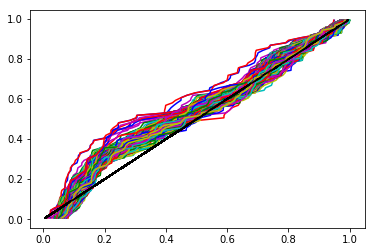

In [4]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_Ia.shape[1]):

    q = float(Dist_DTD_Ia.columns[C][0:3])
    w = float(Dist_DTD_Ia.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_Ia']
    r =Prob_DTD.at[C,'AD_Ia']
    
    plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],N_Ia,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)
plt.show()

In [382]:
Prob_DTD['Mean_Ia'] = (Prob_DTD['KS_Ia']+Prob_DTD['AD_Ia'])/2
Prob_DTD['Mean_CC'] = (Prob_DTD['KS_CC']+Prob_DTD['AD_CC'])/2
Prob_DTD['Mean_Ic'] = (Prob_DTD['KS_Ic']+Prob_DTD['AD_Ic'])/2

Prob_DTD.to_csv('../DTD.csv')

In [383]:
alfa = np.array([-0.5,-0.6,-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9,-2.0,-2.1])
delta = np.array([0.2,25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,250.0,275.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0,800.0,1000.0,1500.0,2000.0])

P = np.array([
    [50.235,46.19,36.365,33.89,33.12,31.74,30.27,24.125,23.22,22.97,22.635,22.755,22.53,17.935,14.26,13.84,13.7,13.61,13.56,9.665],
    [62.415,59.565,54.15,43.685,36.39,34.77,33.545,31.86,31.23,30.495,30.27,30.42,30.49,24.385,19.525,18.925,18.76,18.62,18.46,13.385],
    [61.79,79.295,67.245,53.97,51.475,43.815,42.105,40.345,33.085,32.49,32.04,31.775,31.845,31.295,25.585,25.135,25.105,25.33,24.985,14.53],
    [59.185,82.825,77.635,64.87,62.415,54.695,52.77,50.435,42.385,41.455,40.73,40.86,41.515,33.945,33.345,27.275,27.235,27.93,27.23,16.46],
    [51.55,88.53,85.28,67.62,58.81,63.79,55.49,53.145,44.68,43.12,42.84,43.015,37.195,36.76,35.965,29.97,29.765,29.97,29.415,18.265],
    [51.2,80.92,86.12,70.905,62.18,59.93,56.69,56.025,47.86,46.12,38.595,45.97,46.305,39.23,39.18,38.145,33.145,32.99,32.5,19.865],
    [31.885,79.51,87.025,71.67,70.77,62.2,59.525,57.58,55.615,47.145,47.215,47.255,48.385,47.83,47.04,39.89,40.335,40.935,40.225,22.36],
    [20.45,69.055,85.575,73.155,65.755,71.795,61.61,64.965,50.075,48.7,49.5,50.295,50.38,49.83,49.875,48.54,42.9,43.175,42.62,25.12],
    [13.12,68.335,79.98,71.9,72.205,70.64,63.97,59.725,57.69,50.98,51.31,51.565,52.795,52.66,52.805,45.005,45.38,46.23,45.92,27.105],
    [7.925,72.71,72.585,63.08,69.78,71.33,64.76,61.76,58.76,52.7,53.085,54.015,54.885,55.06,55.05,47.87,48.595,49.4,55.505,33.225],
    [5.935,80.235,68.98,61.515,61.11,71.03,69.74,53.695,58.105,55.11,55.63,56.48,57.09,57.395,55.51,49.155,57.155,56.99,57.815,34.89],
    [5.38,77.925,68.975,52.945,60.165,63.495,57.53,53.965,52.905,56.25,57.31,57.795,59.515,58.89,64.11,56.92,59.16,59.28,59.355,36.645],
    [4.11,62.97,69.105,43.94,50.38,67.86,61.955,46.9,46.275,55.855,57.52,58.465,60.875,59.68,65.465,65.22,67.01,74.27,67.62,37.685],
    [3.74,61.405,56.955,48.355,47.825,60,60.615,39.98,46.545,54.94,57.07,65.35,67.36,66.915,71.61,64.63,73.25,74.39,76.78,43.56]
    ])

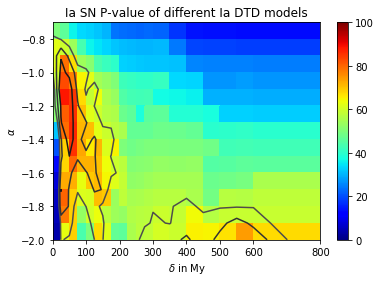

In [385]:
# Gaussian function
stddev = 1
gauss = Gaussian2DKernel(stddev)

# Gaussian convolve
#P = convolve(P, gauss)

fig0, ax0 = plt.subplots()

c = ax0.pcolor(delta,alfa,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

CS = plt.contour(delta, alfa, P, [60,70,80,90],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=10,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('Ia SN P-value of different Ia DTD models');

ax0.set_xticks([0,100,200,300,400,500,600,800]);

#fig0.savefig("../Pv_modelos_Ia_IaDTD.png")

In [386]:
PIa = P

In [387]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

P_alfa = np.arange(la)
X_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        X_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(PIa[j][i]+ PIa[j][i+1]) / 2
    P_alfa[j] = np.sum(X_alfa)

Z_alfa = np.sum(P_alfa)
    
P_delta = np.arange(ld)
X_delta = np.arange(la)
Y_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        X_delta[i] = np.absolute(PIa[i][j])
    P_delta[j] = np.sum(X_delta)

for i in np.arange(ild-1):
    Y_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(P_delta[i]+P_delta[i+1])/2
Z_delta = np.sum(Y_delta)

P_alfa_li = P_alfa / Z_alfa
P_delta_li = P_delta / Z_delta

In [512]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

P_alfa = np.arange(la)
X_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        X_alfa[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(PIa[j][i]+PIa[j][i+1]) / (2)
    P_alfa[j] = np.sum(X_alfa)

Z_alfa = np.sum(P_alfa)
    
P_delta = np.arange(ld)
X_delta = np.arange(la)
Y_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        X_delta[i] = np.absolute(PIa[i][j])
    P_delta[j] = np.sum(X_delta)

for i in np.arange(ild-1):
    Y_delta[i] = np.absolute(np.log10(delta[i+1]/delta[i])) * np.absolute(P_delta[i]+P_delta[i+1]) / (2)
Z_delta = np.sum(Y_delta)

P_alfa_lo = P_alfa / Z_alfa
P_delta_lo = P_delta / Z_delta

In [513]:
Z_alfa,Z_delta

(2657.883794462863, 2657.883794462863)

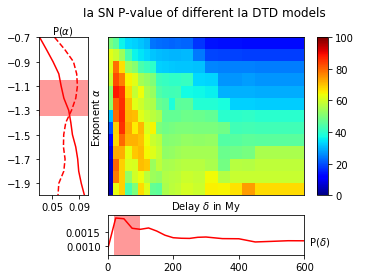

In [514]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(delta,alfa,PIa,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, PIa, [65,75,85],colors=('0.3','0.3','0.3'))
#Pro.clabel(CS, inline=1, fontsize=10,fmt='%1.f')
Pro.set_xlabel(r'Delay $\delta$ in My')
Pro.set_ylabel(r'Exponent $\alpha$')
Pro.set_title('Ia SN P-value of different Ia DTD models \n')
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])

al.plot(P_alfa_li,alfa,'-r')
al.plot(P_alfa_lo,alfa,'--r')
al.axhspan(-1.05,-1.35,facecolor='r',alpha=0.4)
al.set_xlim(np.min(P_alfa_li)*0.95,np.max(P_alfa_li)*1.05)
al.set_yticks([-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9])
al.set_xticks([0.05,0.09])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-2.0,-0.7)

de = plt.subplot(gs[4])

de.plot(delta,P_delta_li,'r')
de.plot(delta,P_delta_lo,'--r')
de.axvspan(20,100,facecolor='r',alpha=0.4)
de.set_ylim(np.min(P_delta_li)*0.95,np.max(P_delta_li)*1.05)
de.set_xticks([0,200,400,600])
de.set_yticks([0.0010,0.0015])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\delta$)',rotation='horizontal')
de.set_xlim(0,600)

plt.show()

#fig.savefig("../Pv_modelos_Ia_IaDTD.png")

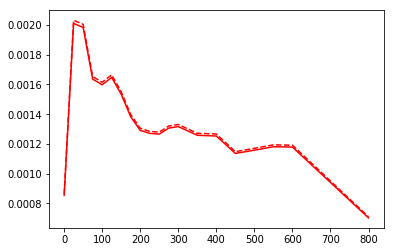

In [517]:
plt.plot(delta,P_delta_li,'-r')
plt.plot(delta,P_delta_lo*0.00535,'--r')
plt.show()

In [426]:
P_delta_lo,P_delta_li

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]),
 array([0.00085425, 0.0020105 , 0.00198362, 0.00163613, 0.00159805,
        0.00164726, 0.0015347 , 0.0013832 , 0.00129144, 0.00127132,
        0.00126618, 0.00130654, 0.0013168 , 0.00125833, 0.00125339,
        0.00113627, 0.00115813, 0.00118128, 0.00117903, 0.00070257]))

In [ ]:
####################### IA DTD II SN ###########################################

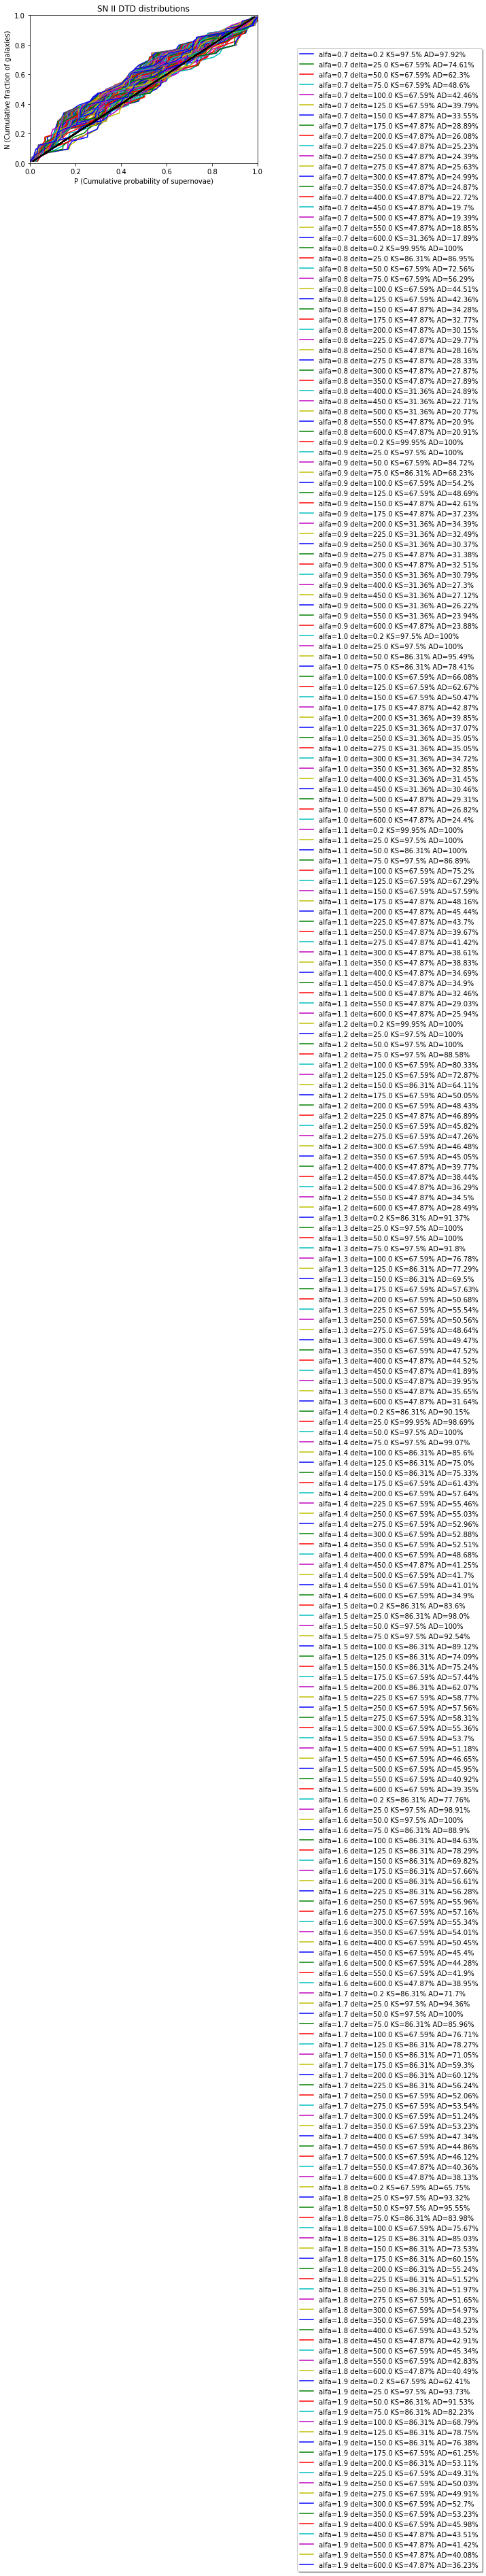

In [372]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_CC.shape[1]):

    q = float(Dist_DTD_CC.columns[C][0:3])
    w = float(Dist_DTD_CC.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_CC']
    r =Prob_DTD.at[C,'AD_CC']
    
    plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[C]],N_CC,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II DTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)
plt.show()

In [151]:
alfa = [-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9]
delta = [0.2,25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,250.0,275.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0]

P = [
    [97.71,71.1,64.945,58.095,55.025,53.69,40.71,38.38,36.975,36.55,36.13,36.75,36.43,36.37,35.295,33.785,33.63,33.36,24.625],
    [99.975,86.63,70.075,61.94,56.05,54.975,41.075,40.32,39.01,38.82,38.015,38.1,37.87,37.88,28.125,27.035,26.065,34.385,34.39],
    [99.975,98.75,76.155,77.27,60.895,58.14,45.24,42.55,32.875,31.925,30.865,39.625,40.19,31.075,29.33,29.24,28.79,27.65,35.875],
    [98.75,98.75,90.9,82.36,66.835,65.13,59.03,45.37,35.605,34.215,33.205,33.205,33.04,32.105,31.405,30.91,38.59,37.345,36.135],
    [99.975,98.75,93.155,92.195,71.395,67.44,62.59,48.015,46.655,45.785,43.77,44.645,43.24,43.35,41.28,41.385,40.165,38.45,36.905],
    [99.975,98.75,98.75,93.04,73.96,70.23,75.21,58.82,58.01,47.38,56.705,57.425,57.035,56.32,43.82,43.155,42.08,41.185,38.18],
    [88.84,98.75,98.75,94.65,72.185,81.8,77.905,62.61,59.135,61.565,59.075,58.115,58.53,57.555,46.195,44.88,43.91,41.76,39.755],
    [88.23,99.32,98.75,98.285,85.955,80.655,80.82,64.51,62.615,61.525,61.31,60.275,60.235,60.05,58.135,44.56,54.645,54.3,51.245],
    [84.955,92.155,98.75,95.02,87.715,80.2,80.775,62.515,74.19,63.18,62.575,62.95,61.475,60.645,59.385,57.12,56.77,54.255,53.47],
    [82.035,98.205,98.75,87.605,85.47,82.3,78.065,71.985,71.46,71.295,61.775,62.375,61.465,60.8,59.02,56.495,55.935,54.745,43.41],
    [79.005,95.93,98.75,86.135,72.15,82.29,78.68,72.805,73.215,71.275,59.825,60.565,59.415,60.41,57.465,56.225,56.855,44.115,43],
    [66.67,95.41,96.525,85.145,71.63,85.67,79.92,73.23,70.775,68.915,69.14,59.62,61.28,57.91,55.555,45.39,56.465,55.21,44.18],
    [65,95.615,88.92,84.27,77.55,82.53,81.345,64.42,69.71,58.45,58.81,58.75,60.145,60.41,56.785,45.69,44.645,43.975,42.05]
]

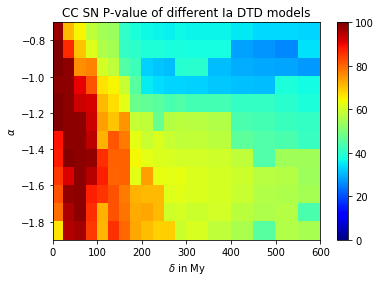

In [152]:
# Gaussian function
stddev = 1
gauss = Gaussian2DKernel(stddev)

# Gaussian convolve
#P = convolve(P, gauss)

fig0, ax0 = plt.subplots()
c = ax0.pcolor(delta,alfa,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

#CS = plt.contour(delta, alfa, P, [60,70,80,90],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=14,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('CC SN P-value of different Ia DTD models');

ax0.set_xticks([0,100,200,300,400,500,600]);

#fig0.savefig("../Pv_modelos_CC_IaDTD.png")

In [153]:
Pcc = P

In [156]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pcc_alfa = np.arange(la)
Xcc_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xcc_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pcc[j][i]+ Pcc[j][i+1]) / 2
    Pcc_alfa[j] = np.sum(Xcc_alfa)

Zcc_alfa = np.sum(Pcc_alfa)
    
Pcc_delta = np.arange(ld)
Xcc_delta = np.arange(la)
Ycc_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xcc_delta[i] = np.absolute(Pcc[i][j])
    Pcc_delta[j] = np.sum(Xcc_delta)

for i in np.arange(ild-1):
    Ycc_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pcc_delta[i]+Pcc_delta[i+1])/2
Zcc_delta = np.sum(Ycc_delta)

Pcc_alfa_li = Pcc_alfa / Zcc_alfa
Pcc_delta_li = Pcc_delta / Zcc_delta

In [159]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pcc_alfa = np.arange(la)
Xcc_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xcc_alfa[i] = np.absolute(np.log10(delta[i+1])-np.log10(delta[i])) * np.absolute(Pcc[j][i]+ Pcc[j][i+1]) / 2
    Pcc_alfa[j] = np.sum(Xcc_alfa)

Zcc_alfa = np.sum(Pcc_alfa)
    
Pcc_delta = np.arange(ld)
Xcc_delta = np.arange(la)
Ycc_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xcc_delta[i] = np.absolute(Pcc[i][j])
    Pcc_delta[j] = np.sum(Xcc_delta)

for i in np.arange(ild-1):
    Ycc_delta[i] = np.absolute(np.log10(delta[i+1])-np.log10(delta[i])) * np.absolute(Pcc_delta[i]+Pcc_delta[i+1])/2
Zcc_delta = np.sum(Ycc_delta)

Pcc_alfa_lo = Pcc_alfa / Zcc_alfa
Pcc_delta_lo = Pcc_delta / Zcc_delta

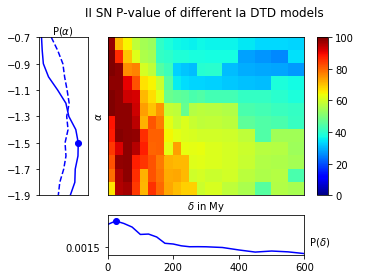

In [160]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(delta,alfa,Pcc,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'$\delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('II SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pcc_alfa_li,alfa,'b')
al.plot(Pcc_alfa_lo,alfa,'--b')
al.plot(np.max(Pcc_alfa_li),alfa[8],'ob')
al.set_xlim(np.min(Pcc_alfa_li)*0.95,np.max(Pcc_alfa_li)*1.1)
al.set_yticks([-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9])
al.set_xticks([0.13])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-1.9,-0.7)

de = plt.subplot(gs[4])


de.plot(delta,Pcc_delta_li,'b')
de.plot(delta[1],np.max(Pcc_delta_li),'ob')
de.set_ylim(np.min(Pcc_delta_li)*0.95,np.max(Pcc_delta_li)*1.1)
de.set_xticks([0,200,400,600])
de.set_yticks([0.0015])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\delta$)',rotation='horizontal')
de.set_xlim(0,600)

plt.show()

#fig.savefig("../Pv_modelos_II_IaDTD.png.png")

In [ ]:
####################### IA DTD Ic SN ###########################################

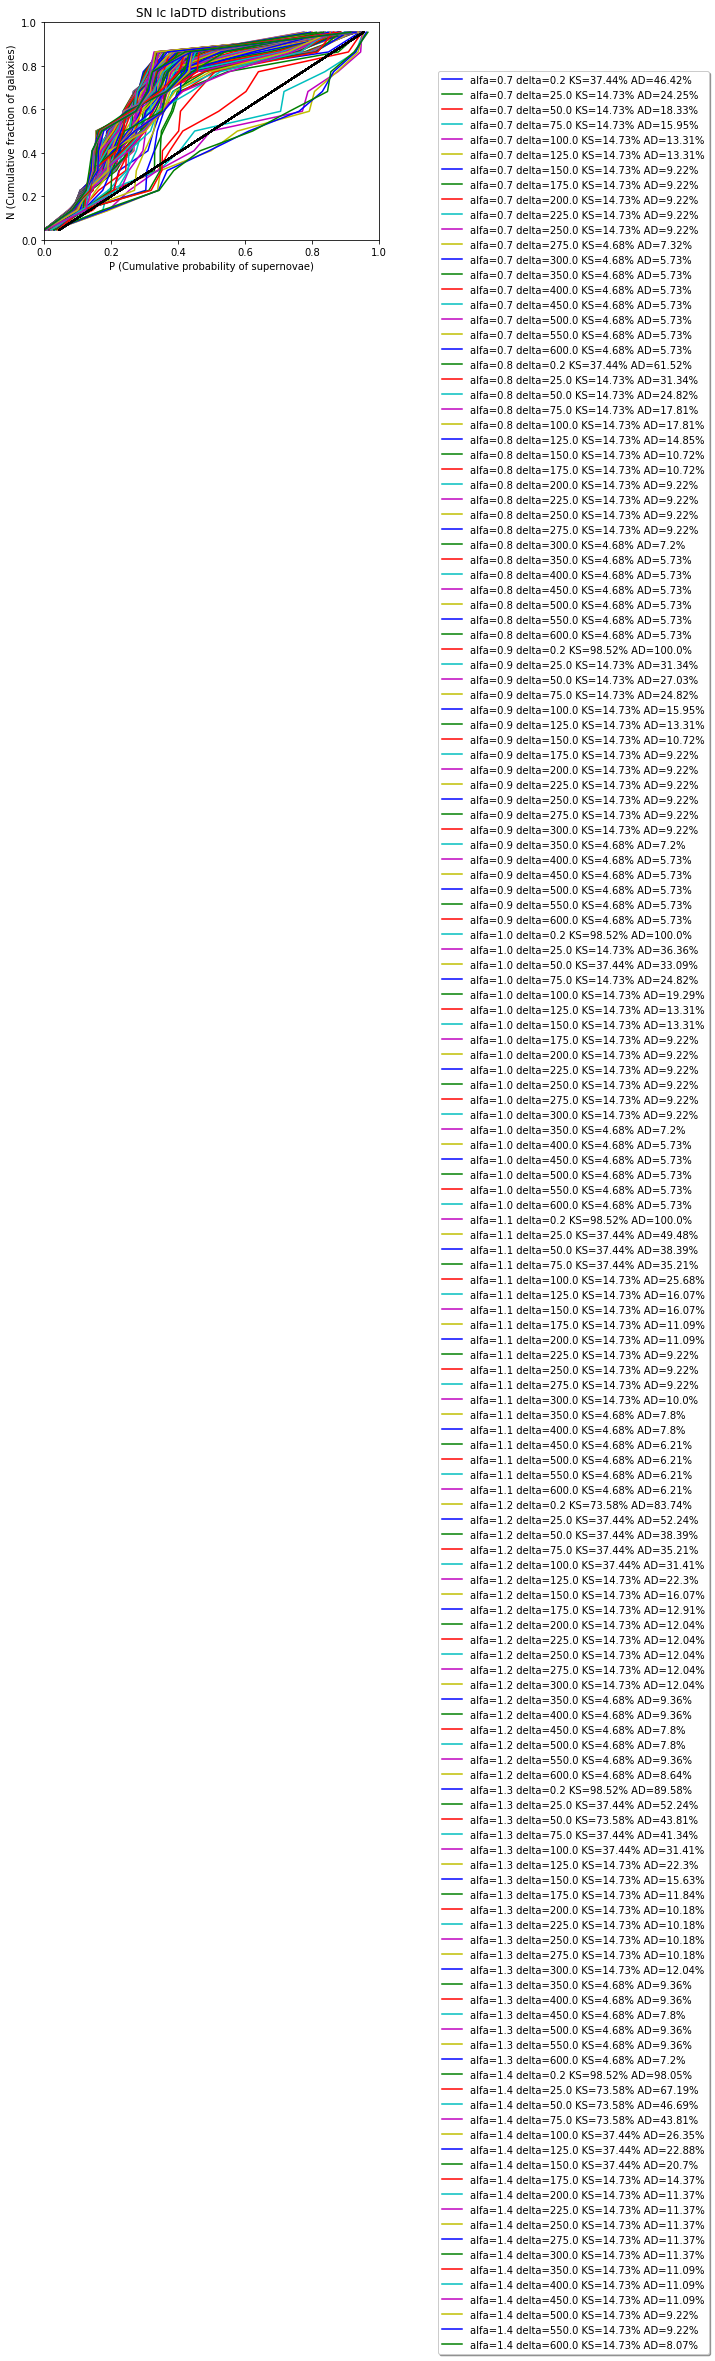

In [471]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_DTD_Ic.shape[1]):

    q = float(Dist_DTD_Ic.columns[C][0:3])
    w = float(Dist_DTD_Ic.columns[C][4:7])
    e = Prob_DTD.at[C,'KS_Ic']
    r =Prob_DTD.at[C,'AD_Ic']
    
    plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[C]],N_Ic,color[C],label='alfa={} delta={} KS={}% AD={}%'.format(q,w,e,r))
    #plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic IaDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

In [166]:
alfa = [-0.7,-0.8,-0.9,-1.0,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9]
delta = [0.2,25.0,50.0,75.0,100.0,125.0,150.0,175.0,200.0,225.0,250.0,275.0,300.0,350.0,400.0,450.0,500.0,550.0,600.0]

P = [
    [41.93,19.49,16.53,15.34,14.02,14.02,11.975,11.975,11.975,11.975,11.975,6,5.205,5.205,5.205,5.205,5.205,5.205,5.205],
    [49.48,23.035,19.775,16.27,16.27,14.79,12.725,12.725,11.975,11.975,11.975,11.975,5.94,5.205,5.205,5.205,5.205,5.205,5.205],
    [99.26,23.035,20.88,19.775,15.34,14.02,12.725,11.975,11.975,11.975,11.975,11.975,11.975,5.94,5.205,5.205,5.205,5.205,5.205],
    [99.26,25.545,35.265,19.775,17.01,14.02,14.02,11.975,11.975,11.975,11.975,11.975,11.975,5.94,5.205,5.205,5.205,5.205,5.205],
    [99.26,43.46,37.915,36.325,20.205,15.4,15.4,12.91,12.91,11.975,11.975,11.975,12.365,6.24,6.24,5.445,5.445,5.445,5.445],
    [78.66,44.84,37.915,36.325,34.425,18.515,15.4,13.82,13.385,13.385,13.385,13.385,13.385,7.02,7.02,6.24,6.24,7.02,6.66],
    [94.05,44.84,58.695,39.39,34.425,18.515,15.18,13.285,12.455,12.455,12.455,12.455,13.385,7.02,7.02,6.24,7.02,7.02,5.94],
    [98.285,70.385,60.135,58.695,31.895,30.16,29.07,14.55,13.05,13.05,13.05,13.05,13.05,12.91,12.91,12.91,11.975,11.975,11.4],
    [98.285,73.445,62.68,58.695,54.695,31.96,28.235,24.415,24.415,24.415,11.96,11.96,11.96,12.06,12.91,12.91,11.975,11.975,11.4],
    [95.625,89.995,62.68,61.385,54.695,31.96,31.59,25.35,24.415,24.415,12.07,12.07,24.415,13.185,13.185,14.255,12.36,12.36,11.55],
    [91.63,92.75,64.125,61.385,56.62,31.96,29.025,26.665,24.05,24.05,24.05,11.77,12.98,25.535,13.44,12.41,12.41,12.41,11.595],
    [94.05,92.75,64.125,61.385,56.62,33.545,29.025,25.865,24.05,24.05,24.05,11.77,11.77,24.665,13.44,13.145,13.145,13.145,11.595],
    [94.05,89.015,67.015,64.07,61.775,54.175,27.685,25.865,24.05,24.05,24.855,12.425,13.01,12.27,12.98,13.145,13.145,13.145,13.145]
]

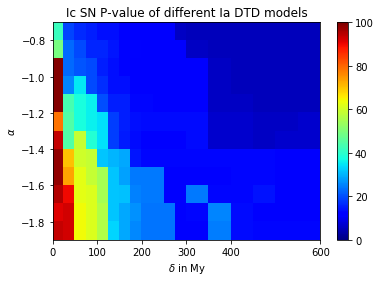

In [168]:
# Gaussian function
stddev = 1
gauss = Gaussian2DKernel(stddev)

# Gaussian convolve
#P = convolve(P, gauss)

fig0, ax0 = plt.subplots()
c = ax0.pcolor(delta,alfa,P,vmin=0, vmax=100,cmap='jet')
fig0.colorbar(c)

#CS = plt.contour(delta, alfa, P, [60,75,90,95],colors=('0.3','0.2','0.1','0'))
#ax0.clabel(CS, inline=1, fontsize=14,fmt='%1.f')

ax0.set_xlabel(r'$\delta$ in My')
ax0.set_ylabel(r'$\alpha$')
ax0.set_title('Ic SN P-value of different Ia DTD models');

ax0.set_xticks([0,100,200,300,400,600]);

#fig0.savefig("../Pv_modelos_Ic_IaDTD.png")

In [169]:
Pic = P

In [170]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pic_alfa = np.arange(la)
Xic_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xic_alfa[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pic[j][i]+ Pic[j][i+1]) / 2
    Pic_alfa[j] = np.sum(Xic_alfa)

Zic_alfa = np.sum(Pic_alfa)
    
Pic_delta = np.arange(ld)
Xic_delta = np.arange(la)
Yic_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xic_delta[i] = np.absolute(Pic[i][j])
    Pic_delta[j] = np.sum(Xic_delta)

for i in np.arange(ild-1):
    Yic_delta[i] = np.absolute(delta[i+1]-delta[i]) * np.absolute(Pic_delta[i]+Pic_delta[i+1])/2
Zic_delta = np.sum(Yic_delta)

Pic_alfa_li = Pic_alfa / Zic_alfa
Pic_delta_li = Pic_delta / Zic_delta

In [171]:
la = np.float(len(alfa))
ld = np.float(len(delta))
ila = len(alfa)
ild = len(delta)

Pic_alfa = np.arange(la)
Xic_alfa = np.arange(ld-1)

for j in np.arange(ila):
    for i in np.arange(ild-1):
        Xic_alfa[i] = np.absolute(np.log10(delta[i+1])-np.log10(delta[i])) * np.absolute(Pic[j][i]+ Pic[j][i+1]) / 2
    Pic_alfa[j] = np.sum(Xic_alfa)

Zic_alfa = np.sum(Pic_alfa)
    
Pic_delta = np.arange(ld)
Xic_delta = np.arange(la)
Yic_delta = np.arange(ld-1)

for j in np.arange(ild):
    for i in np.arange(ila):
        Xic_delta[i] = np.absolute(Pic[i][j])
    Pic_delta[j] = np.sum(Xic_delta)

for i in np.arange(ild-1):
    Yic_delta[i] = np.absolute(np.log10(delta[i+1])-np.log10(delta[i])) * np.absolute(Pic_delta[i]+Pic_delta[i+1])/2
Zic_delta = np.sum(Yic_delta)

Pic_alfa_lo = Pic_alfa / Zic_alfa
Pic_delta_lo = Pic_delta / Zic_delta

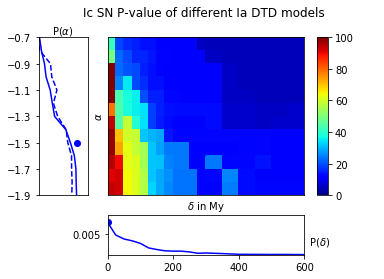

In [172]:
fig = plt.figure()

gs = gridspec.GridSpec(2, 3,width_ratios=[1,4,1], height_ratios=[4,1])

Pro = plt.subplot(gs[1])

c = Pro.pcolor(delta,alfa,Pic,vmin=0, vmax=100,cmap='jet')
#CS = plt.contour(delta, alfa, P, [8,10,20,25],colors=('0.3','0.2','0.1','0'))
#Pro.clabel(CS, inline=1, fontsize=14,fmt='%1.f')
Pro.set_xlabel(r'$\delta$ in My')
Pro.set_ylabel(r'$\alpha$')
Pro.set_title('Ic SN P-value of different Ia DTD models \n');
Pro.set_yticks([])
Pro.set_xticks([])

co = plt.subplot(gs[2])

adres = fig.add_axes([0.77, 0.331, 0.025, 0.55])
plt.colorbar(c,cax = adres)
co.axis('off')

al = plt.subplot(gs[0])


al.plot(Pic_alfa_li,alfa,'b')
al.plot(Pic_alfa_lo,alfa,'--b')
al.plot(np.max(Pic_alfa_li),alfa[8],'ob')
al.set_xlim(np.min(Pic_alfa_li)*0.95,np.max(Pic_alfa_li)*1.2)
al.set_yticks([-0.7,-0.9,-1.1,-1.3,-1.5,-1.7,-1.9])
al.set_xticks([0.15])
al.xaxis.set_label_position("top")
al.set_xlabel(r'P($\alpha$)')
al.set_ylim(-1.9,-0.7)

de = plt.subplot(gs[4])


de.plot(delta,Pic_delta_li,'b')
de.plot(delta[0],np.max(Pic_delta_li),'ob')
de.set_ylim(np.min(Pic_delta_li)*0.95,np.max(Pic_delta_li)*1.2)
de.set_xticks([0,200,400,600])
de.set_yticks([0.005])
de.yaxis.set_label_position("right")
de.set_ylabel(r'       P($\delta$)',rotation='horizontal')
de.set_xlim(0,600)

plt.show()

#fig.savefig("../Pv_modelos_Ic_IaDTD.png.png")

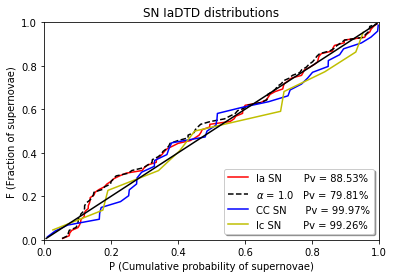

In [309]:
color = ['r','b','--k','y']
    
plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[77]],N_Ia,color[0],label='Ia SN       Pv = 88.53%')
#plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[77]],N_Ia,''+color[0]+'.')

plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[58]],N_Ia,color[2],label=r'$\alpha$ = 1.0   Pv = 79.81%')
#plt.plot(Dist_DTD_Ia[Dist_DTD_Ia.columns[58]],N_Ia,''+color[0]+'.')
     
plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[76]],N_CC,color[1],label='CC SN      Pv = 99.97%')
#plt.plot(Dist_DTD_CC[Dist_DTD_CC.columns[76]],N_CC,''+color[1]+'.')

plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[57]],N_Ic,color[3],label='Ic SN       Pv = 99.26%')
#plt.plot(Dist_DTD_Ic[Dist_DTD_Ic.columns[57]],N_Ic,''+color[0]+'.')
   
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN IaDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(1.0, 0, 0, 0.35),shadow=True)    


#plt.savefig("../IaDTD_Distribution.png")

plt.show()

In [740]:
a = Dist_DTD_Ia[Dist_DTD_Ia.columns[77]]
b = Dist_DTD_CC[Dist_DTD_CC.columns[77]]
c = Dist_DTD_Ic[Dist_DTD_Ic.columns[77]]

s = np.arange(float(len(a)+len(b)+len(c)))

for i in np.arange(len(a)):
    s[i] = a[i]
    
for i in np.arange(len(b)):
    s[len(a)+i] = b[i]
    
for i in np.arange(len(c)):
    s[len(a)+len(b)+i] = c[i]

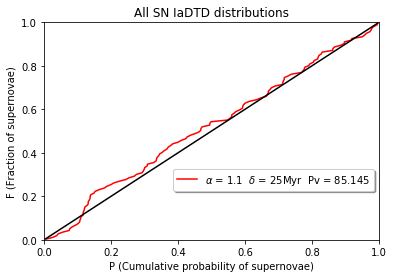

In [752]:
p = np.sort(s)

N = np.arange(len(p))
N = N + 0.5
N = np.double(N)/(len(N))

KS  = ks_2samp(p,  N)[1]
KS = np.around(KS*100,2)

AD  = anderson_ksamp([p,  N])[2]
AD  = np.absolute(np.around(AD*100,2))


plt.plot(p,N,'r',label=r'$\alpha$ = 1.1  $\delta$ = 25Myr  Pv = {}'.format((KS+AD)/2))
plt.plot(N,N,'k')

plt.title('All SN IaDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')
plt.legend(bbox_to_anchor=(1.0, 0, 0, 0.35),shadow=True)    


#plt.savefig("../AllSN_IaDTD_Distribution.png")

plt.show()

In [ ]:
####################### SFR DTD ###########################################

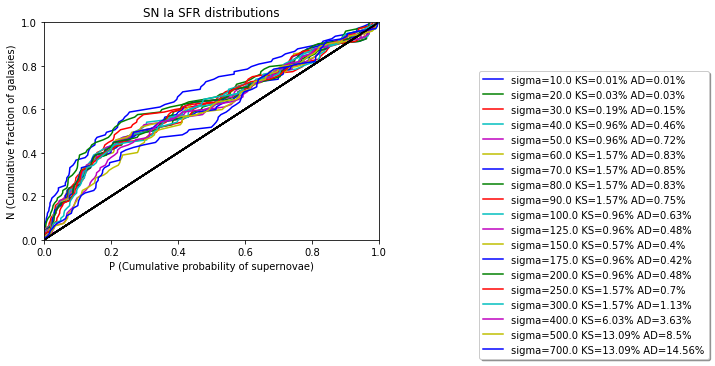

In [359]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']

for C in np.arange(Dist_SFR_Ia.shape[1]):
    
    q = float(Dist_SFR_Ia.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_Ia']
    r =Prob_SFR.at[C,'AD_Ia']
    
    plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],N_Ia,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

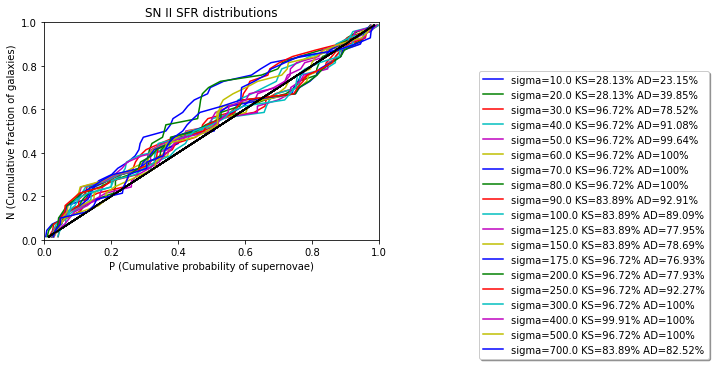

In [360]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']


for C in np.arange(Dist_SFR_CC.shape[1]):
    
    q = float(Dist_SFR_CC.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_CC']
    r =Prob_SFR.at[C,'AD_CC']
    
    
    plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[C]],N_CC,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

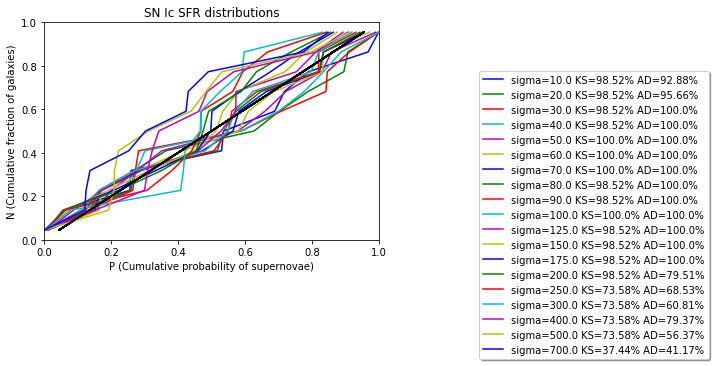

In [361]:
color = ['b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y','b','g','r','c','m','y']


for C in np.arange(Dist_SFR_Ic.shape[1]):
    
    q = float(Dist_SFR_Ic.columns[C][0:3])
    e = Prob_SFR.at[C,'KS_Ic']
    r =Prob_SFR.at[C,'AD_Ic']
    
    
    plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[C]],N_Ic,color[C],label='sigma={} KS={}% AD={}%'.format(q,e,r))
    #plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic SFR distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

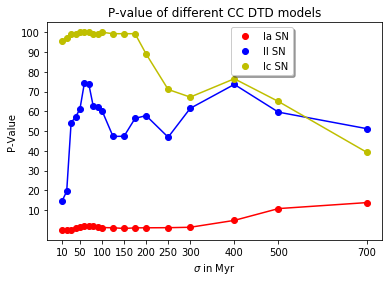

In [362]:
sigma = [10,20,30,40,50,60,70,80,90,100,125,150,175,200,250,300,400,500,700]
IaP = [0.01,0.035,0.195,1.1,1.27,1.82,1.82,1.805,1.27,1.205,1.095,0.75,1.045,1.085,1.135,1.35,4.83,10.795,13.825]
ccP = [14.86,19.555,54.28,57.08,61.18,74.175,73.87,62.785,62.3,60.355,47.305,47.395,56.43,57.82,46.91,61.5,73.615,59.58,51.245]
IcP = [95.66,97.09,99.26,99.26,100,100,100,99.26,99.26,100,99.26,99.26,99.26,89.015,71.055,67.195,76.475,64.975,39.305]

fig, ax = plt.subplots()

ax.set_xlabel(r'$\sigma$ in Myr')
ax.set_ylabel('P-Value')
ax.set_title('P-value of different CC DTD models');

plt.plot(sigma,IaP,'.r',markersize=12,label='Ia SN')
plt.plot(sigma,IaP,'-r')

plt.plot(sigma,ccP,'.b',markersize=12,label='II SN')
plt.plot(sigma,ccP,'-b')

plt.plot(sigma,IcP,'.y',markersize=12,label='Ic SN')
plt.plot(sigma,IcP,'-y')

ax.set_xticks([10,50,100,150,200,250,300,400,500,700]);
ax.set_yticks([10,20,30,40,50,60,70,80,90,100]);

plt.legend(bbox_to_anchor=(0.75, 0.05, 0, 0.95),shadow=True) 

#fig.savefig("../Pv_modelos_CC_ccDTD_2.0.png")

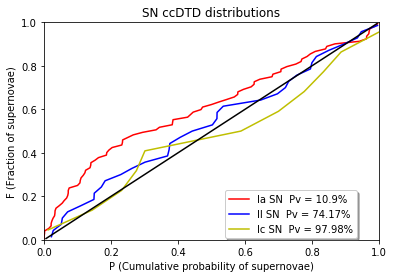

In [363]:
color = ['r','b','y']

plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[7]],N_Ia,color[0],label='Ia SN  Pv = 10.9%')
#plt.plot(Dist_SFR_Ia[Dist_SFR_Ia.columns[2]],N_Ia,''+color[0]+'.')
     
plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[5]],N_CC,color[1],label='II SN  Pv = 74.17%')
#plt.plot(Dist_SFR_CC[Dist_SFR_CC.columns[2]],N_CC,''+color[1]+'.')   

plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[3]],N_Ic,color[2],label='Ic SN  Pv = 97.98%')
#plt.plot(Dist_SFR_Ic[Dist_SFR_Ic.columns[2]],N_Ic,''+color[1]+'.')   

plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN ccDTD distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../ccDTD_Distribution.png")

plt.show()

In [ ]:
####################### Ha DTD ###########################################

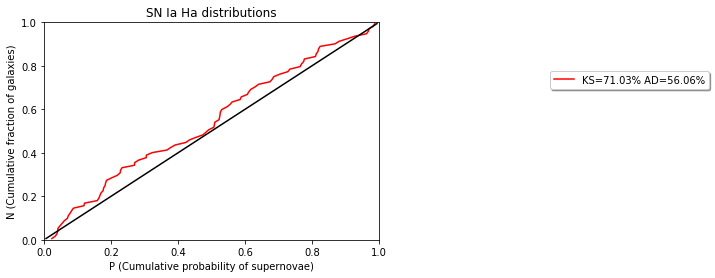

In [341]:
color = ['r']


for C in np.arange(Dist_Ha_Ia.shape[1]):
    
    e = Prob_Ha.at[C,'KS_Ia']
    r =Prob_Ha.at[C,'AD_Ia']
    
    plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

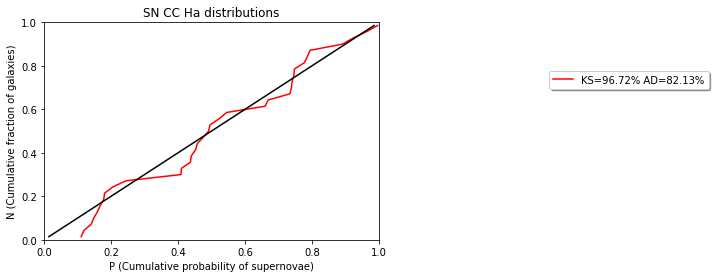

In [342]:
color = ['r']


for C in np.arange(Dist_Ha_CC.shape[1]):
    
    e = Prob_Ha.at[C,'KS_CC']
    r =Prob_Ha.at[C,'AD_CC']
    
    plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

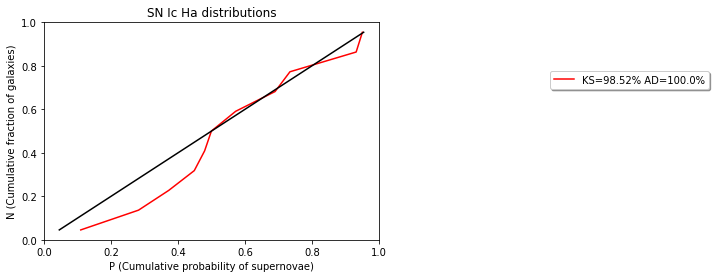

In [343]:
color = ['r']


for C in np.arange(Dist_Ha_CC.shape[1]):
    
    e = Prob_Ha.at[C,'KS_Ic']
    r =Prob_Ha.at[C,'AD_Ic']
    
    plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic Ha distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

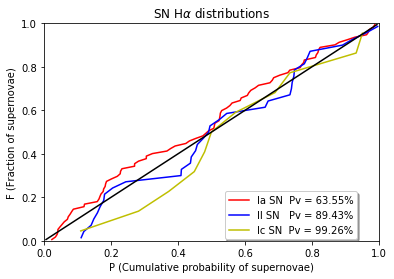

In [344]:
color = ['r','b','y']

plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 63.55%')
#plt.plot(Dist_Ha_Ia[Dist_Ha_Ia.columns[2]],N_Ia,''+color[0]+'.')

plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 89.43%')
#plt.plot(Dist_Ha_CC[Dist_Ha_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[0]],N_Ic,color[2],label='Ic SN  Pv = 99.26%')
#plt.plot(Dist_Ha_Ic[Dist_Ha_Ic.columns[2]],N_Ic,''+color[1]+'.')

plt.plot(N_Ia,N_Ia,'k')
    
plt.title(r'SN H$\alpha$ distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../Ha_Distribution_2.0.png")

plt.show()

In [ ]:
####################### MASS DTD ###########################################

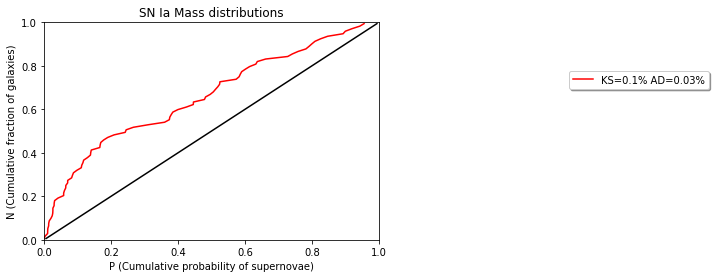

In [345]:
color = ['r']



for C in np.arange(Dist_Mass_Ia.shape[1]):
    
    e = Prob_Mass.at[C,'KS_Ia']
    r =Prob_Mass.at[C,'AD_Ia']
    
    plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

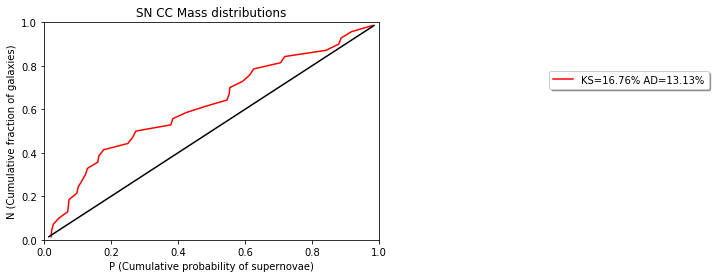

In [346]:
color = ['r']


for C in np.arange(Dist_Mass_CC.shape[1]):
    
    e = Prob_Mass.at[C,'KS_CC']
    r =Prob_Mass.at[C,'AD_CC']
    
    plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN CC Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

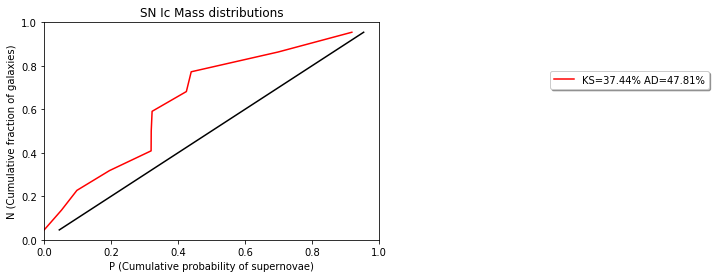

In [347]:
color = ['r']


for C in np.arange(Dist_Mass_Ic.shape[1]):
    
    e = Prob_Mass.at[C,'KS_Ic']
    r =Prob_Mass.at[C,'AD_Ic']
    
    plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

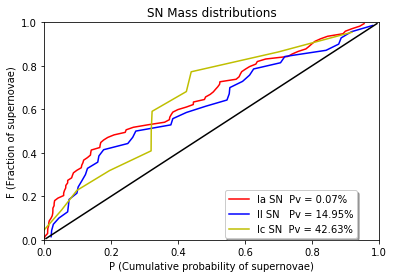

In [348]:
color = ['r','b','y']
    
plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 0.07%')
#plt.plot(Dist_Mass_Ia[Dist_Mass_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 14.95%')
#plt.plot(Dist_Mass_CC[Dist_Mass_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[0]],N_Ic,color[2],label='Ic SN  Pv = 42.63%')
#plt.plot(Dist_Mass_Ic[Dist_Mass_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Mass distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../Mass_Distribution_2.0.png")

plt.show()

In [ ]:
####################### ZA DTD ###########################################

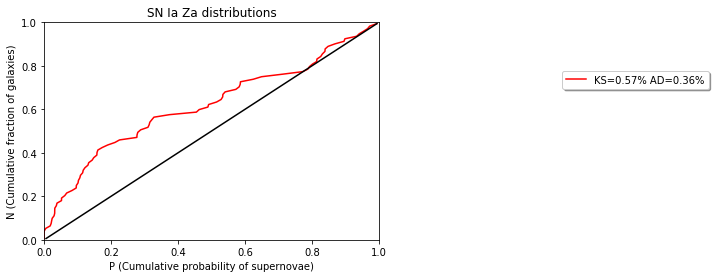

In [349]:
color = ['r']


for C in np.arange(Dist_Za_Ia.shape[1]):
    
    e = Prob_Za.at[C,'KS_Ia']
    r =Prob_Za.at[C,'AD_Ia']
    
    plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

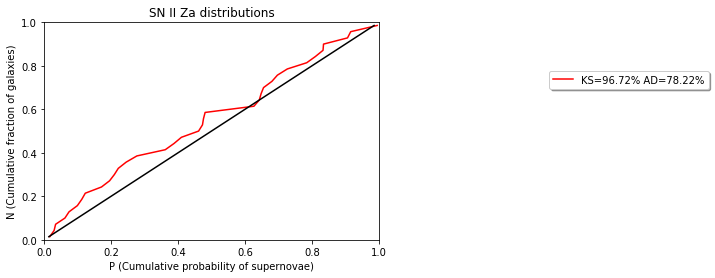

In [350]:
color = ['r']


for C in np.arange(Dist_Za_CC.shape[1]):
    
    e = Prob_Za.at[C,'KS_CC']
    r =Prob_Za.at[C,'AD_CC']
    
    plt.plot(Dist_Za_CC[Dist_Za_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_CC[Dist_Za_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

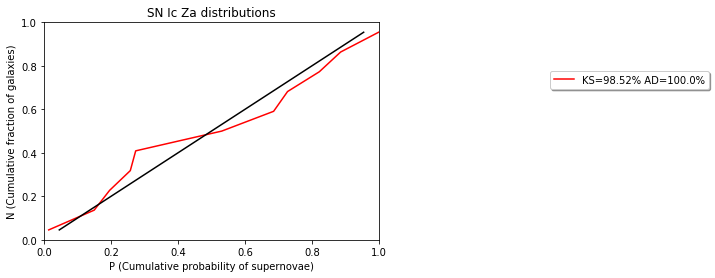

In [351]:
color = ['r']


for C in np.arange(Dist_Za_Ic.shape[1]):
    
    e = Prob_Za.at[C,'KS_Ic']
    r =Prob_Za.at[C,'AD_Ic']
    
    plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic Za distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

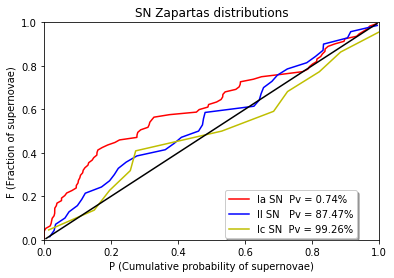

In [352]:
color = ['r','b','y']
    
plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 0.74%')
#plt.plot(Dist_Za_Ia[Dist_Za_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_Za_CC[Dist_Za_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 87.47%')
#plt.plot(Dist_Za_CC[Dist_Za_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[0]],N_Ic,color[2],label='Ic SN  Pv = 99.26%')
#plt.plot(Dist_Za_Ic[Dist_Za_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../Za_Distribution_2.0.png")

plt.show()

In [ ]:
####################### ZAB DTD ###########################################

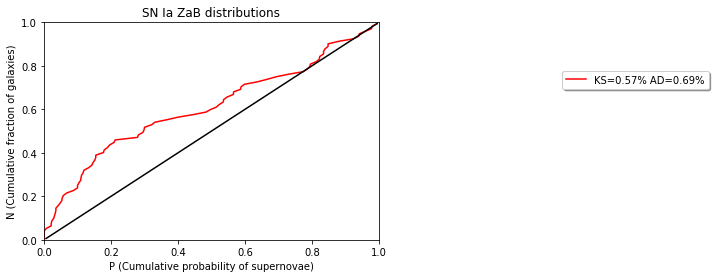

In [353]:
color = ['r']


for C in np.arange(Dist_ZaB_Ia.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_Ia']
    r =Prob_ZaB.at[C,'AD_Ia']
    
    plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[C]],N_Ia,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[C]],N_Ia,''+color[C]+'*')
    
    plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Ia ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

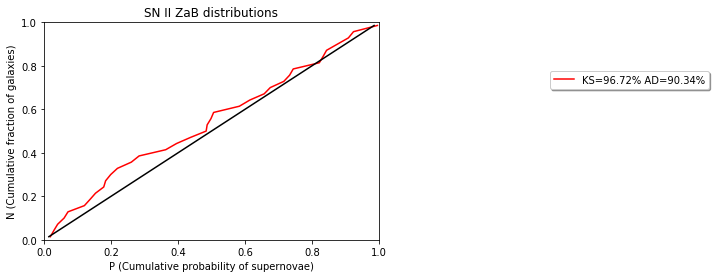

In [354]:
color = ['r']


for C in np.arange(Dist_ZaB_CC.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_CC']
    r =Prob_ZaB.at[C,'AD_CC']
    
    plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[C]],N_CC,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[C]],N_CC,''+color[C]+'*')
    
    plt.plot(N_CC,N_CC,'k')
    
plt.title('SN II ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

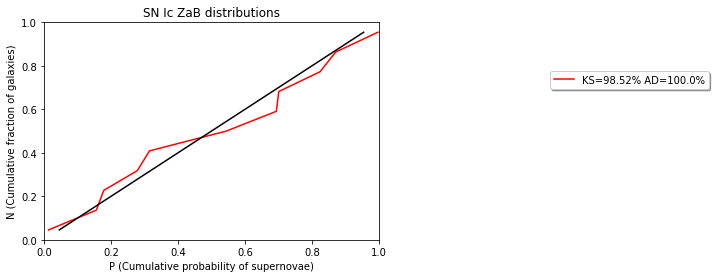

In [355]:
color = ['r']


for C in np.arange(Dist_ZaB_Ic.shape[1]):
    
    e = Prob_ZaB.at[C,'KS_Ic']
    r =Prob_ZaB.at[C,'AD_Ic']
    
    plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[C]],N_Ic,color[C],label='KS={}% AD={}%'.format(e,r))
    #plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[C]],N_Ic,''+color[C]+'*')
    
    plt.plot(N_Ic,N_Ic,'k')
    
plt.title('SN Ic ZaB distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('N (Cumulative fraction of galaxies)')

plt.legend(bbox_to_anchor=(1, 0, 1, 0.8),shadow=True)    
plt.show()

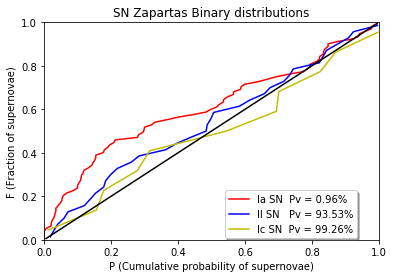

In [356]:
color = ['r','b','y']
    
plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[0]],N_Ia,color[0],label='Ia SN  Pv = 0.96%')
#plt.plot(Dist_ZaB_Ia[Dist_ZaB_Ia.columns[2]],N_Ia,''+color[0]+'.')
    
plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[0]],N_CC,color[1],label='II SN   Pv = 93.53%')
#plt.plot(Dist_ZaB_CC[Dist_ZaB_CC.columns[2]],N_CC,''+color[1]+'.')

plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[0]],N_Ic,color[2],label='Ic SN  Pv = 99.26%')
#plt.plot(Dist_ZaB_Ic[Dist_ZaB_Ic.columns[2]],N_Ic,''+color[1]+'.')
    
plt.plot(N_Ia,N_Ia,'k')
    
plt.title('SN Zapartas Binary distributions')
plt.axis([0.00, 1.00, 0.00, 1.00])
plt.xlabel('P (Cumulative probability of supernovae)')
plt.ylabel('F (Fraction of supernovae)')

plt.legend(bbox_to_anchor=(0.95, 0, 0, 0.25),shadow=True)    

#plt.savefig("../ZaB_Distribution_2.0.png")

plt.show()